<center><h1> DATA PRE PROCESSING TECHNIQUES! </h1> </center>

<b>Principle:</b><br>
 Data preprocessing in Data Warehousing and Mining (DWM) is the process of preparing raw data for analysis by cleaning, transforming, and organizing it. This ensures the data is accurate and consistent, making it usable for mining and extracting insights.

<b>Key Steps:</b><br>
1. Data Cleaning: Fixing errors and handling missing values.
2. Data Integration: Combining data from different sources.
3. Data Transformation: Converting data into the right format (e.g., normalization).
4. Data Reduction: Reducing data size while retaining essential information.

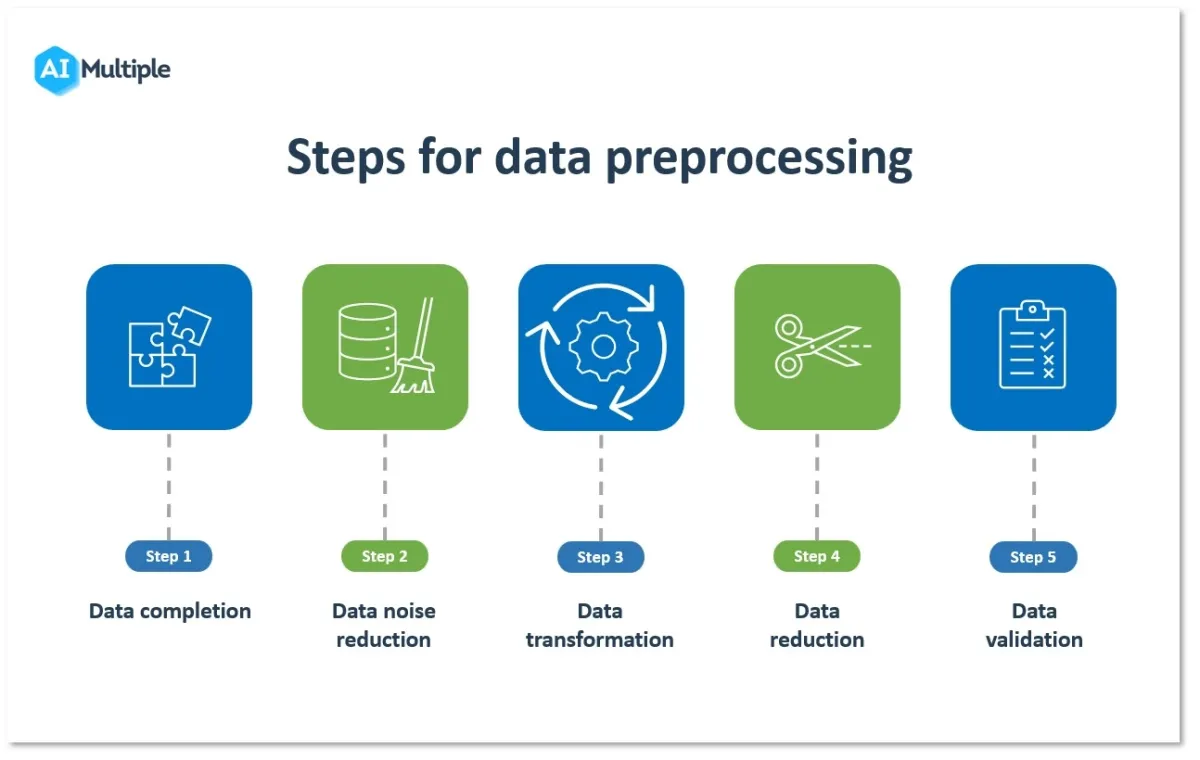

<h2> <b>STEP:1: Loading the Dataset <b> </h2>

**Operation Name**: Load Dataset <br>
**Operation Function**: pd.read_csv() <br>
**Function Explanation**: This function is used to load a CSV file into a DataFrame for data manipulation and preprocessing.

In [2]:
import pandas as pd

# Load the dataset from a CSV file
df = pd.read_csv('sample_data.csv')

# Display the first few rows of the data
df.head()


,Age,Salary,City,Purchased
0,25.0,50000.0,New York,No
1,NaN,54000.0,San Francisco,Yes
2,35.0,61000.0,New York,No
3,45.0,NaN,Los Angeles,No
4,22.0,52000.0,San Francisco,Yes


<h2> <b>STEP 2: Handling Missing Data (Imputation) </b> </h2>
Operation Name: Handling Missing Data <br>
Operation Function: SimpleImputer(strategy='mean') <br>
Function Explanation: This function fills missing numerical values with the mean of the column.

In [3]:
from sklearn.impute import SimpleImputer

# Impute missing numerical values with the mean
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])
df['Salary'] = imputer.fit_transform(df[['Salary']])

# Check data after imputation
df.head()


,Age,Salary,City,Purchased
0,25.0,50000.0,New York,No
1,33.0,54000.0,San Francisco,Yes
2,35.0,61000.0,New York,No
3,45.0,54000.0,Los Angeles,No
4,22.0,52000.0,San Francisco,Yes


<h2> <b>STEP 3: Encoding Categorical Data (Label Encoding) </b> </h2>
Operation Name: Encoding Categorical Data (Label Encoding) <br>
Operation Function: LabelEncoder() <br>
Function Explanation: This function converts categorical values (e.g., Yes/No) into numerical labels (e.g., 1/0).

In [5]:
from sklearn.preprocessing import LabelEncoder

# Label encoding the 'Purchased' column
label_encoder = LabelEncoder()
df['Purchased'] = label_encoder.fit_transform(df['Purchased'])

# Check data after encoding
df.head()


,Age,Salary,City,Purchased
0,25.0,50000.0,New York,0
1,33.0,54000.0,San Francisco,1
2,35.0,61000.0,New York,0
3,45.0,54000.0,Los Angeles,0
4,22.0,52000.0,San Francisco,1


<h2> <b>STEP 4: Encoding Categorical Data (One-Hot Encoding) </b> </h2>
Operation Name: Encoding Categorical Data (One-Hot Encoding) <br>
Operation Function: pd.get_dummies() <br>
Function Explanation: This function converts categorical variables into binary columns (e.g., cities into binary columns like New York, San Francisco).

In [6]:
# One-Hot Encoding the 'City' column
df = pd.get_dummies(df, columns=['City'], drop_first=True)

# Check data after one-hot encoding
df.head()


,Age,Salary,Purchased,City_New York,City_San Francisco
0,25.0,50000.0,0,True,False
1,33.0,54000.0,1,False,True
2,35.0,61000.0,0,True,False
3,45.0,54000.0,0,False,False
4,22.0,52000.0,1,False,True


<h2> <b>STEP 5: Feature Scaling </b> </h2>
Operation Name: Feature Scaling <br>
Operation Function: StandardScaler() <br>
Function Explanation: This function standardizes features by removing the mean and scaling to unit variance.

In [7]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical features
scaler = StandardScaler()
df[['Age', 'Salary']] = scaler.fit_transform(df[['Age', 'Salary']])

# Check data after scaling
df.head()


,Age,Salary,Purchased,City_New York,City_San Francisco
0,-1.118658,-0.928191,0,True,False
1,0.000000,0.000000,1,False,True
2,0.279665,1.624334,0,True,False
3,1.677988,0.000000,0,False,False
4,-1.538155,-0.464095,1,False,True


<h2> <b>STEP 6: Handling Outliers </b> </h2>
Operation Name: Handling Outliers <br>
Operation Function: Remove/Capping <br>
Function Explanation: This step either removes outliers or caps values outside a threshold. In this case, we’ll remove rows with "extreme" values.

In [8]:
# Removing outliers (if Age > 3 standard deviations)
df = df[(df['Age'] > -3) & (df['Age'] < 3)]

# Check data after outlier removal
df.head()


,Age,Salary,Purchased,City_New York,City_San Francisco
0,-1.118658,-0.928191,0,True,False
1,0.000000,0.000000,1,False,True
2,0.279665,1.624334,0,True,False
3,1.677988,0.000000,0,False,False
4,-1.538155,-0.464095,1,False,True


<h2> <b>STEP 7: Data Transformation (Log Transformation) </b> </h2>
Operation Name: Data Transformation (Log Transformation) <br>
Operation Function: np.log() <br>
Function Explanation: This function applies a logarithmic transformation to reduce skewness in the data.

In [23]:
import numpy as np

# Add a small constant to avoid log(0)
df['Salary_log'] = np.log(df['Salary'] + 1)

# Check the data
df.head()


C:\Users\ejila\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Age,Salary,Purchased,City_New York,City_San Francisco,Salary_log
0,-1.118658,-0.928191,0,True,False,-2.633745
1,0.000000,-0.696143,1,False,True,-1.191199
2,0.279665,1.624334,0,True,False,0.964827
3,1.677988,-0.696143,0,False,False,-1.191199
4,-1.538155,-0.464095,1,False,True,-0.623799


<h2> <b>STEP 8: Dimensionality Reduction (PCA) </b> </h2>
Operation Name: Dimensionality Reduction (PCA) <br>
Operation Function: PCA() <br>
Function Explanation: Principal Component Analysis reduces the number of features by projecting the data into fewer dimensions.

In [17]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Step 1: Replace inf values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Handle missing values by filling them with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df.drop('Purchased', axis=1))

# Step 3: Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_imputed)

# Check data after PCA
print(X_pca[:5])

df.head()


[[ 1.44552433  0.0589088 ]
 [ 0.05829403 -0.217687  ]
 [-1.28431769 -0.86885028]
 [-1.27794441  1.12466015]
 [ 1.46452247 -0.87663264]]


,Age,Salary,Purchased,City_New York,City_San Francisco,Salary_log
0,-1.118658,-0.928191,0,True,False,NaN
1,0.000000,0.000000,1,False,True,NaN
2,0.279665,1.624334,0,True,False,0.485098
3,1.677988,0.000000,0,False,False,NaN
4,-1.538155,-0.464095,1,False,True,NaN


<h2> <b>STEP 9: Splitting the Dataset </b> </h2>
Operation Name: Splitting the Dataset <br>
Operation Function: train_test_split() <br>
Function Explanation: This function splits the dataset into training and testing sets for model training and evaluation.

In [18]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df.drop('Purchased', axis=1)
y = df['Purchased']

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(X_train.shape, X_test.shape)


(5, 5) (2, 5)


<h2> <b>STEP 10: Removing Duplicates </b> </h2>
Operation Name: Removing Duplicates <br>
Operation Function: drop_duplicates() <br>
Function Explanation: This function removes any duplicate rows from the dataset.

In [19]:
# Remove duplicate rows from the dataset
df = df.drop_duplicates()

# Check data after removing duplicates
df.head()


,Age,Salary,Purchased,City_New York,City_San Francisco,Salary_log
0,-1.118658,-0.928191,0,True,False,NaN
1,0.000000,0.000000,1,False,True,NaN
2,0.279665,1.624334,0,True,False,0.485098
3,1.677988,0.000000,0,False,False,NaN
4,-1.538155,-0.464095,1,False,True,NaN
